In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [11]:
import pandas as pd

In [12]:
data = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
data.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [14]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
data.shape

(10000, 11)

In [16]:
data = pd.get_dummies(data = data ,columns=['Geography','Gender',],drop_first=True)

In [33]:
x = data.drop(['Exited'],axis =1)
y = data[['Exited']]

In [34]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [35]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
x= obj.fit_transform(x)

In [36]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size = .2,random_state=1)

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

2024-08-11 16:19:29.682124: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 16:19:29.682275: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 16:19:29.881000: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [26]:
model = Sequential()
model.add(Dense(11,activation = 'relu',input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [37]:
history = model.fit(xtrain,ytrain,epochs = 100,validation_split = .2 )

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7496 - loss: 0.5088 - val_accuracy: 0.8087 - val_loss: 0.4487
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8103 - loss: 0.4335 - val_accuracy: 0.8156 - val_loss: 0.4255
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8269 - loss: 0.4073 - val_accuracy: 0.8181 - val_loss: 0.4143
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8258 - loss: 0.4145 - val_accuracy: 0.8194 - val_loss: 0.4072
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8335 - loss: 0.4028 - val_accuracy: 0.8206 - val_loss: 0.4020
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8442 - loss: 0.3857 - val_accuracy: 0.8256 - val_loss: 0.3971
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8459 - loss: 0.3811 - val_accuracy: 0.8288 - val_loss: 0.3917
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8436 - loss: 0.3753 - val_accu

In [38]:
model.layers[1].get_weights()

[array([[-4.87027735e-01,  5.59475064e-01, -2.80475348e-01,
          4.59999949e-01, -8.58224630e-01,  6.06538475e-01,
         -3.08864057e-01,  5.02862871e-01, -4.91592318e-01,
          8.87330472e-01,  7.11870074e-01],
        [ 5.20672500e-02,  5.85611761e-01,  8.67485344e-01,
         -2.16310233e-01,  8.36262643e-01, -3.26566845e-01,
         -1.53186888e-01, -1.62034124e-01,  1.80173427e-01,
         -2.89069116e-01, -4.12072390e-01],
        [-1.03842616e-01,  2.43198559e-01, -2.15136990e-01,
          1.31532386e-01, -1.03174902e-01, -3.71932715e-01,
          1.62130013e-01, -8.60912055e-02,  4.47725415e-01,
         -4.46373492e-01,  3.03767979e-01],
        [ 1.60470665e-01, -3.17272782e-01,  2.41857648e-01,
         -1.63156107e-01,  2.55241424e-01,  4.52080280e-01,
         -6.44537341e-03, -1.43216580e-01,  1.19535342e-01,
          9.10288468e-02, -1.99505240e-01],
        [-2.50131577e-01,  4.52561886e-04,  5.99653482e-01,
         -6.42304480e-01,  8.96011055e-01, -

In [39]:
model.layers[0].get_weights()

[array([[-6.7128576e-02,  1.4436702e-01, -2.4553616e-01, -1.3434370e-01,
         -3.3022955e-01,  2.5162303e-01,  6.2083229e-02,  2.7373046e-01,
         -1.5815748e-01,  4.3919338e-03, -5.5968752e-03],
        [ 1.3161300e+00, -1.7549345e-01, -2.0609965e+00,  2.7843335e+00,
         -2.1970448e-01, -1.9540670e+00,  7.3471433e-01,  3.9853629e-01,
          1.8560661e-01, -1.0391513e+00,  1.4749485e+00],
        [ 1.4061680e-01,  1.1839597e-01,  7.1309906e-01,  6.6623658e-02,
         -2.6481411e-01,  1.1756785e+00,  4.4545867e-02, -1.7125718e-02,
          6.8345302e-01, -1.2852040e-01, -8.8120013e-01],
        [ 2.8571358e-02, -5.9751266e-01,  2.5825602e-01, -7.3390283e-02,
         -8.5909992e-01,  3.6113071e-01, -3.9616823e-01, -9.6227098e-01,
         -2.8671113e-01, -3.6265975e-01,  2.0061208e-01],
        [ 2.5308068e+00, -1.4413706e+00, -1.1618677e+00, -4.3010113e-01,
         -1.1205742e+00, -3.8896945e-01,  2.0876131e+00, -2.9498562e-02,
         -1.0981112e+00,  5.2991651e-0

In [40]:
model.predict(xtest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.05210644],
       [0.06225071],
       [0.04969485],
       ...,
       [0.02458799],
       [0.03629834],
       [0.40394476]], dtype=float32)

In [41]:
import numpy as np
predict_y = np.where(model.predict(xtest)>.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict_y)

0.866

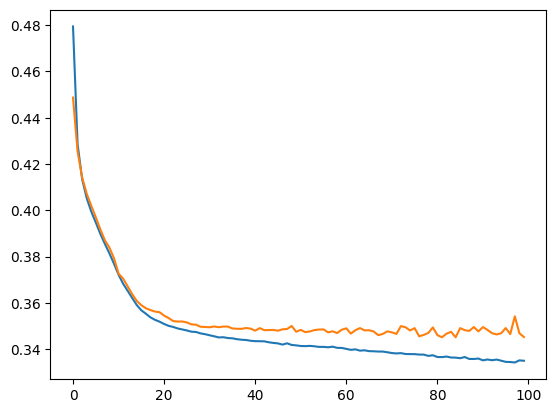

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

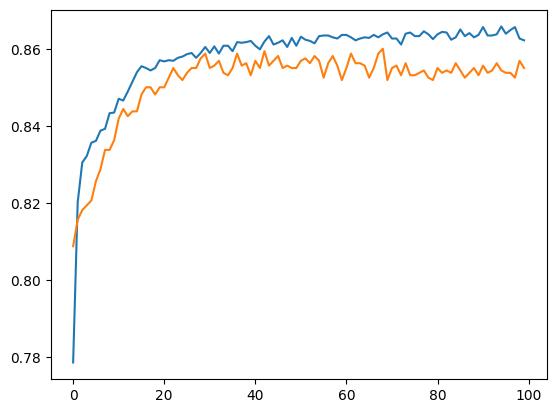

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])